<span style="font-size:18px; color:red">Statement: Assignment3+4 was completed by Ling Leng and Jiali Yang, of which Assignment4 was completed by Ling Leng, and Assignment3 was completed by Jiali Yang</span>

# Economic Indicators and Migration Flows in New Zealand: Interactions and Policy Implications

#### Student name:Ling Leng
#### Student ID: 24014297


# Introduction

This analysis analyzed New Zealand's economic and migration fields through the steps of importing datasets, data cleaning, EDA, and data visualization. In the context of globalization, New Zealand as an economy has received widespread attention for its immigration policies and economic strategies. This analysis aims to explore the relationship between New Zealand's GDP, government debt, inflation, unemployment and international migration flows to reveal how these economic indicators interact and influence migration trends. Through detailed data research, we hope to provide insights for policy making and help optimize the country's economic and immigration policies.

#### Dataset sources: Web scraping/States NZ

### Research Questions

1. What is the relationship between GDP per capita growth and government debt? How does government debt change during periods of good economic performance?  
2. How does inflation affect the inflow and outflow of immigrants? Does the relationship between inflation and unemployment conform to traditional economic theory?  
3. How do changes in government debt affect the net inflow of immigrants? What are the characteristics of migration flows during periods of high debt levels?  
4. How do immigration flows reflect changing economic conditions? At different stages of economic performance, in what ways is the impact of immigration on the economy reflected?

### Executive Summary

[Some Basic Settings]    
[Data Acquisition]: Web Scraping--Data Transform--Import static datasets--Data Transform  
[Data Wrangling]: Data Clean--EDA/Data Visulisation  
[Data Integration]:Merging--Visulisation--Analysis  
[Conclusion]

# Some Settings

In [99]:
# import library
import requests                 
from bs4 import BeautifulSoup   
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns

In [100]:
# adjust some settings
from pylab import rcParams

rcParams['figure.figsize'] = 15, 10
rcParams['font.size'] = 20
rcParams['axes.facecolor'] = 'white'

%matplotlib inline

In [101]:
# put plots to be embedded into the notebook
%matplotlib inline

# Data Acquisition

### Web Scraping

In [102]:
# make some extra settings
import json
from time import sleep
from datetime import datetime

In [103]:
# read page
url = "https://en.wikipedia.org/wiki/Economy_of_New_Zealand"
response = requests.get(url)
response

<Response [200]>

In [104]:
# Parse HTML content using BeautifulSoup objects
scraping_html_table_EQ = BeautifulSoup(response.content, "lxml") 
scraping_html_table_EQ

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-appearance-disabled vector-feature-appearance-pinned-clientpref-0 vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Economy of New Zealand - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector

In [105]:
# Get the table and convert it into dataframe
scraping_html_table_EQ = scraping_html_table_EQ.find_all("table", "wikitable")
df = pd.read_html(str(scraping_html_table_EQ))
first_table_df = df[1]
first_table_df

,Year,GDP (bil. US$ PPP),GDP per capita (US$ PPP),GDP (bil. US$ nominal),GDP per capita (US$ nominal),GDP growth (real),Inflation rate (%),Unemployment (%),Government debt in GDP (%)
0,1980,28.5,9177.3,22.5,7246.9,1.0%,17.1%,4.0%,NaN
1,1981,32.2,10288.8,23.4,7503.1,3.0%,15.5%,3.9%,NaN
2,1982,35.1,11151.9,23.2,7370.6,2.9%,16.1%,4.4%,NaN
3,1983,36.4,11464.6,22.5,7064.3,−0.1%,7.4%,6.2%,NaN
4,1984,40.4,12566.6,22.4,6960.7,6.9%,6.1%,7.2%,NaN
5,1985,42.1,12995.1,22.5,6943.5,1.2%,15.4%,3.9%,64.2%
6,1986,43.8,13375.0,27.4,8373.5,1.8%,13.2%,4.2%,68.6%
7,1987,45.9,13915.8,36.9,11189.5,2.4%,15.8%,4.2%,63.0%
8,1988,47.8,14354.0,45.5,13643.7,0.6%,6.4%,5.8%,54.8%
9,1989,49.9,14826.9,44.1,13100.0,0.4%,5.7%,7.3%,55.0%


In [106]:
# Set 'Year' column as index
GDP_data = first_table_df.set_index('Year')
GDP_data

,GDP (bil. US$ PPP),GDP per capita (US$ PPP),GDP (bil. US$ nominal),GDP per capita (US$ nominal),GDP growth (real),Inflation rate (%),Unemployment (%),Government debt in GDP (%)
Year,,,,,,,,
1980,28.5,9177.3,22.5,7246.9,1.0%,17.1%,4.0%,NaN
1981,32.2,10288.8,23.4,7503.1,3.0%,15.5%,3.9%,NaN
1982,35.1,11151.9,23.2,7370.6,2.9%,16.1%,4.4%,NaN
1983,36.4,11464.6,22.5,7064.3,−0.1%,7.4%,6.2%,NaN
1984,40.4,12566.6,22.4,6960.7,6.9%,6.1%,7.2%,NaN
1985,42.1,12995.1,22.5,6943.5,1.2%,15.4%,3.9%,64.2%
1986,43.8,13375.0,27.4,8373.5,1.8%,13.2%,4.2%,68.6%
1987,45.9,13915.8,36.9,11189.5,2.4%,15.8%,4.2%,63.0%
1988,47.8,14354.0,45.5,13643.7,0.6%,6.4%,5.8%,54.8%


In [107]:
# Delete unnecessary columns
GDP_data.drop(['GDP (bil. US$ PPP)', 'GDP (bil. US$ nominal)', 'GDP per capita (US$ nominal)'], axis=1, inplace=True)

# Filter data from 2018-2023
data1 = GDP_data[GDP_data.index.isin([2018, 2019, 2020, 2021, 2022, 2023])]
data1.rename(columns={'GDP per capita (US$ PPP)': 'GDP per capita'}, inplace=True)
data1

D:\SoftwareDownloads\Anaconda\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,GDP per capita,GDP growth (real),Inflation rate (%),Unemployment (%),Government debt in GDP (%)
Year,,,,,
2018,42617.4,3.4%,1.6%,4.3%,28.0%
2019,43686.0,2.4%,1.6%,4.2%,32.0%
2020,42445.5,−2.1%,1.7%,4.6%,43.6%
2021,45879.6,5.1%,3.0%,4.3%,52.0%
2022,48202.1,3.3%,2.2%,4.4%,56.9%
2023,49462.1,1.7%,2.0%,4.7%,58.5%


### Import static dataset

In [108]:
# Import migration dataset
data_Migration = pd.read_csv(r'D:\L Leng\master of analytics\158739 Data Mastery\Assignment\A3+4\datasets\2\Migration.csv')
data_Migration

,time,Arrivals,Departures,Net
0,2002.0,124293.0,74785.0,49508.0
1,2003.0,132704.0,73762.0,58942.0
2,2004.0,111579.0,82234.0,29345.0
3,2005.0,103050.0,92285.0,10765.0
4,2006.0,105203.0,91427.0,13776.0
5,2007.0,112711.0,97148.0,15563.0
6,2008.0,115512.0,104623.0,10889.0
7,2009.0,118388.0,103568.0,14820.0
8,2010.0,103467.0,90347.0,13120.0
9,2011.0,100902.0,108087.0,-7185.0


In [109]:
data2 = data_Migration.iloc[16:22]

# Data Transform
data2 = data2.astype(int)
data2

,time,Arrivals,Departures,Net
16,2018,138629,88438,50191
17,2019,138988,89000,49988
18,2020,177317,87390,89927
19,2021,53667,56415,-2748
20,2022,55850,75314,-19464
21,2023,183649,97786,85863


In [110]:
# Set time as index and name it as 'Year'
data2.set_index(' time', inplace=True) 
data2.index.name = 'Year' 
data2

,Arrivals,Departures,Net
Year,,,
2018,138629,88438,50191
2019,138988,89000,49988
2020,177317,87390,89927
2021,53667,56415,-2748
2022,55850,75314,-19464
2023,183649,97786,85863


In [111]:
# Import Migration of countries dataset
data_countries = pd.read_csv(r'D:\L Leng\master of analytics\158739 Data Mastery\Assignment\A3+4\datasets\3\Migration of countries.csv')
data_countries

,time,China,India,Japan,Korea,Philippines,Germany,UK,Canada,US,South Africa
0,2004,2298,2103,69,296,314,109,3314,65,258,430
1,2005,1601,1295,79,246,309,182,6263,94,440,486
2,2006,1801,976,93,254,360,236,7679,121,475,724
3,2007,1400,///A,99,250,540,190,5885,85,432,630
4,2008,1499,1028,73,219,683,***,4410,95,384,751
5,2009,1595,1086,99,234,620,160,3738,Nan,345,676
6,2010,1818,865,96,???,719,157,3083,114,362,680
7,2011,2191,827,98,251,662,149,2961,131,383,598
8,2012,2237,1088,///,242,736,157,2405,93,279,449
9,2013,2227,951,116,253,///B,154,2173,87,***,422


In [112]:
data3 = data_countries.iloc[14:20]
data3

,time,China,India,Japan,Korea,Philippines,Germany,UK,Canada,US,South Africa
14,2018,2572,1066,???,244,562,NaN,1086,92,279,369
15,2019,2016,857,102,197,456,142,907,101,Nan,300
16,2020,960,507,59,97,295,85,638,57,241,180
17,2021,1658,745,107,211,525,147,909,103,254,221
18,2022,2658,1736,132,327,3471,148,815,98,320,430
19,2023,4173,3090,150,272,10365,163,872,94,493,572


In [113]:
data3.set_index(' time', inplace=True) 
data3.index.name = 'Year' 
data3

,China,India,Japan,Korea,Philippines,Germany,UK,Canada,US,South Africa
Year,,,,,,,,,,
2018,2572,1066,???,244,562,NaN,1086,92,279,369
2019,2016,857,102,197,456,142,907,101,Nan,300
2020,960,507,59,97,295,85,638,57,241,180
2021,1658,745,107,211,525,147,909,103,254,221
2022,2658,1736,132,327,3471,148,815,98,320,430
2023,4173,3090,150,272,10365,163,872,94,493,572


# Data Wrangling

In [114]:
# Replace illegal characters and handle missing values
data3.replace('???', np.nan, inplace=True)  
data3.replace('NaN', np.nan, inplace=True)  

# Convert all data to numeric type
data3 = data3.apply(pd.to_numeric, errors='coerce')

# Fill NaN with mean of each column 
data3.fillna(data3.mean(), inplace=True)

data3

D:\SoftwareDownloads\Anaconda\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,China,India,Japan,Korea,Philippines,Germany,UK,Canada,US,South Africa
Year,,,,,,,,,,
2018,2572,1066,110.0,244,562,137.0,1086,92,279.0,369
2019,2016,857,102.0,197,456,142.0,907,101,317.4,300
2020,960,507,59.0,97,295,85.0,638,57,241.0,180
2021,1658,745,107.0,211,525,147.0,909,103,254.0,221
2022,2658,1736,132.0,327,3471,148.0,815,98,320.0,430
2023,4173,3090,150.0,272,10365,163.0,872,94,493.0,572


### EDA/Data Visulisation

In [36]:
# Descriptive statistics
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
GDP per capita,6.0,45382.116667,2966.150607,42445.5,42884.55,44782.8,47621.475,49462.1


Volatility: The standard deviation of GDP per capita is relatively small, indicating that GDP per capita changes relatively steadily from 2018 to 2023.  
Growth: Growth from minimum to maximum indicates that the economy has grown over the years.

In [37]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
Arrivals,6.0,124683.333333,57319.639213,53667.0,76544.75,138808.5,167734.75,183649.0
Departures,6.0,82390.500000,14608.748198,56415.0,78333.00,87914.0,88859.50,97786.0
Net,6.0,42292.833333,45014.559900,-19464.0,10436.00,50089.5,76945.00,89927.0


Arrivals: The average value is high and the standard deviation is large, indicating that the number of arrivals fluctuates greatly each year.  
Departures: The average is lower than Arrivals. The number of departures is relatively stable but still fluctuates.  
Net (Net Migration): Net migration numbers fluctuate greatly, with changes from negative to positive indicating extremely high net migration mobility. Negative values, particularly in 2021 and 2022, may indicate that more people are leaving New Zealand than arriving.

In [38]:
data3.describe().T

,count,mean,std,min,25%,50%,75%,max
China,6.0,2339.500000,1094.471151,960.0,1747.50,2294.0,2636.50,4173.0
India,6.0,1333.500000,956.592024,507.0,773.00,961.5,1568.50,3090.0
Japan,6.0,110.000000,30.848015,59.0,103.25,108.5,126.50,150.0
Korea,6.0,224.666667,77.893945,97.0,200.50,227.5,265.00,327.0
Philippines,6.0,2612.333333,3985.518369,295.0,473.25,543.5,2743.75,10365.0
Germany,6.0,137.000000,26.929538,85.0,138.25,144.5,147.75,163.0
UK,6.0,871.166667,145.870376,638.0,829.25,889.5,908.50,1086.0
Canada,6.0,90.833333,17.081179,57.0,92.50,96.0,100.25,103.0
US,6.0,317.400000,91.840296,241.0,260.25,298.2,319.35,493.0
South Africa,6.0,345.333333,144.191077,180.0,240.75,334.5,414.75,572.0


Volatility: The data fluctuate across countries. For example, the standard deviations of the Philippines and Germany are very high, indicating that the immigration data of these countries fluctuate significantly between years.  
China and India: The averages are high, indicating higher numbers of immigrants from these two countries, but China's extremely large increase in 2023 is particularly significant, possibly due to changes in policy or economic conditions.  
Minimum and maximum values: The extreme values ​​in each country's data show specific conditions in extreme years. For example, the maximum value in the Philippines may represent a special immigration wave in a certain year.

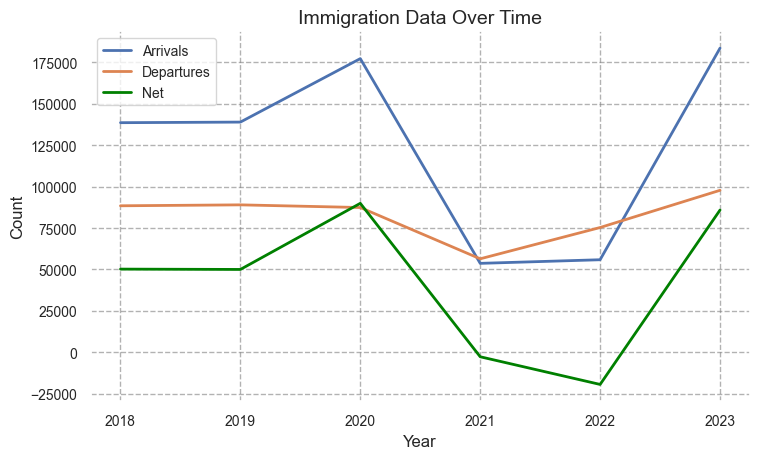

In [115]:
# a. Time series analysis
plt.figure(figsize=(8, 5))

plt.plot(data2['Arrivals'], label='Arrivals', linewidth=2)
plt.plot(data2['Departures'], label='Departures', linewidth=2)
plt.plot(data2['Net'], label='Net', color='green', linewidth=2)

plt.title('Immigration Data Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.legend(fontsize=10)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.grid(True, linestyle='--', alpha=0.6, color='gray', linewidth=1)  

plt.tight_layout()
plt.show()

Based on this chart, several key points can be observed.  

Significant fluctuations: Immigration data (including arrivals, departures and net numbers) show significant year-to-year fluctuations. This may reflect the impact of policy changes, changes in the international environment or economic conditions on migration flows.  

Notable changes in 2020: The 2020 data show a significant decline followed by a rapid rebound. This pattern may be related to the global COVID-19 pandemic, with travel restrictions and lockdowns in 2020 likely leading to a temporary decline in immigration numbers.  

Changes in net migration:  
* Before 2020, net migration showed a steady upward trend.  
* In 2021 and 2022, net migration will be negative, indicating that more people left than arrived during these two years. This may be related to border policies and economic recovery after the epidemic.  
* Net migration rose sharply in 2023, reaching a recent high, which may reflect a significant recovery in migration activity as the global epidemic situation improves and borders reopen.  

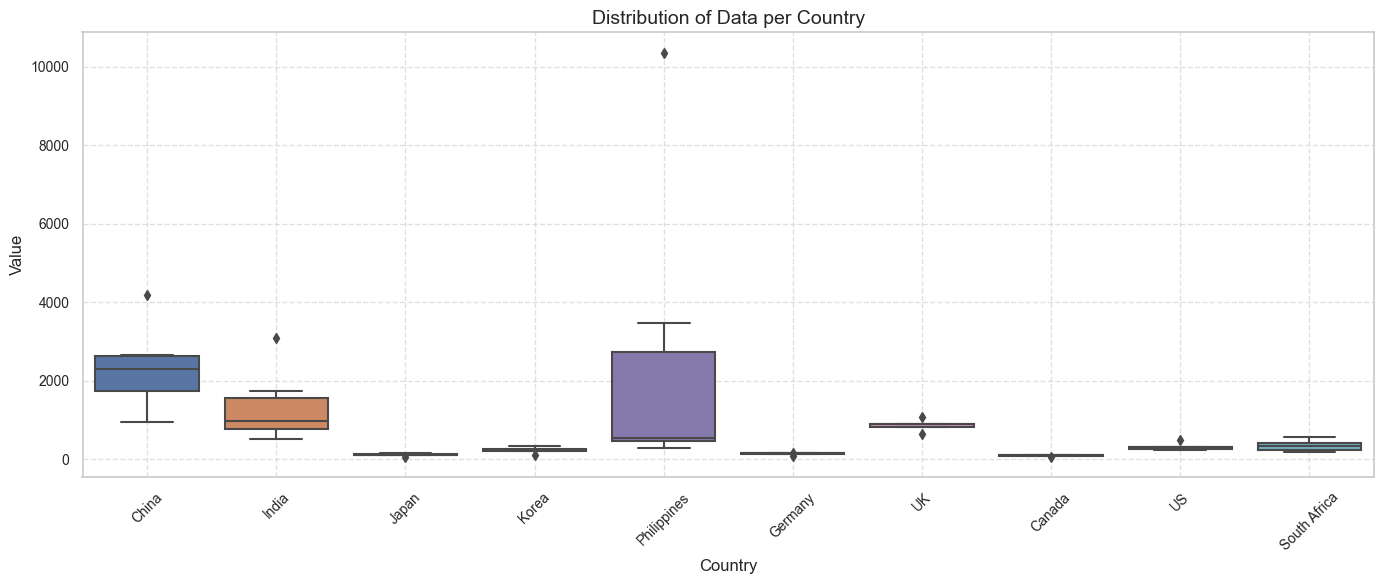

In [116]:
# b. Box plot
sns.set(style="whitegrid")

plt.figure(figsize=(14, 6))
sns.boxplot(data=data3)

plt.xticks(rotation=45, fontsize=10) 
plt.yticks(fontsize=10)  

plt.title('Distribution of Data per Country', fontsize=14)
plt.ylabel('Value', fontsize=12)
plt.xlabel('Country', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6, linewidth=1)

plt.tight_layout()
plt.show()

From the box plot, the following points can be observed.  

Difference between median and quartiles:  

* China, the Philippines, and India have relatively high median distributions, indicating that these countries have large numbers of immigrants relative to other countries.  
* The data distribution for Japan, Canada, and the United States is relatively low, which may indicate relatively low numbers of immigrants from these countries.  

Presence of outliers:  

* The outliers in the boxplot (the small dots in the plot) appear primarily in the data for China, the Philippines, and the United States, indicating that there were years when immigration from these countries was unusually high or low.  

Data dispersion:  

* The higher boxes for the Philippines and China indicate greater variability in the data for these countries, i.e. greater fluctuations in the number of immigrants.  
* In contrast, countries such as Canada, the United States, Germany and the United Kingdom have smaller boxes, indicating that their data distribution is more concentrated and the number of immigrants is relatively stable.  

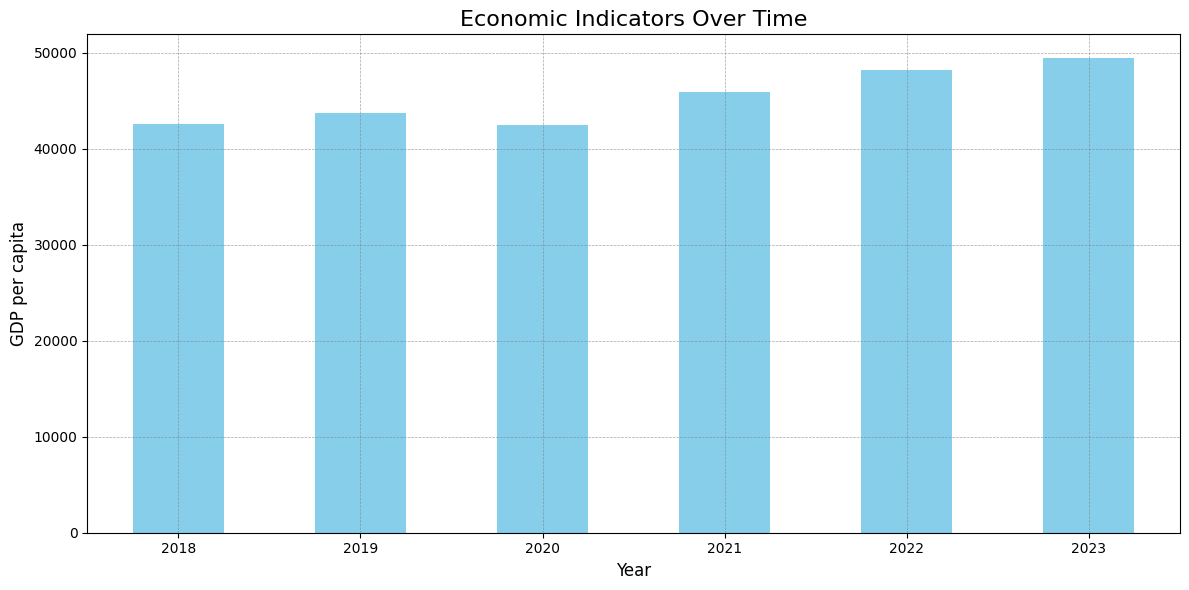

In [117]:
# c. Bar chart
plt.style.use('default')  

data1['GDP per capita'].plot(kind='bar', figsize=(12, 6), color='skyblue')

plt.title('Economic Indicators Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP per capita', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.7)

plt.tight_layout()
plt.show()

This graphic shows how New Zealand's GDP per capita has changed between 2018 and 2023. The following points can be observed from the figure:  

* Steady growth: GDP per capita will increase year by year until 2023 from a low level in 2018. Especially since 2020, the growth rate has been significant.  
* Fluctuations in 2020: In 2020, per capita GDP declined compared to the previous year, which may be related to the global economic environment, especially the impact of the COVID-19 epidemic.  
* Recovery and growth: After 2021, per capita GDP will resume growth and continue until 2023, showing the rapid recovery and growth momentum of the economy.

# Data Integration

In [118]:
# Merging dataset
merged_data1 = pd.merge(data1, data2, on='Year', how='inner')
merged_data1

,GDP per capita,GDP growth (real),Inflation rate (%),Unemployment (%),Government debt in GDP (%),Arrivals,Departures,Net
Year,,,,,,,,
2018,42617.4,3.4%,1.6%,4.3%,28.0%,138629,88438,50191
2019,43686.0,2.4%,1.6%,4.2%,32.0%,138988,89000,49988
2020,42445.5,−2.1%,1.7%,4.6%,43.6%,177317,87390,89927
2021,45879.6,5.1%,3.0%,4.3%,52.0%,53667,56415,-2748
2022,48202.1,3.3%,2.2%,4.4%,56.9%,55850,75314,-19464
2023,49462.1,1.7%,2.0%,4.7%,58.5%,183649,97786,85863


In [119]:
# Remove percent sign and convert to float
merged_data1['Inflation rate (%)'] = merged_data1['Inflation rate (%)'].str.rstrip('%').astype('float') / 100
merged_data1['Unemployment (%)'] = merged_data1['Unemployment (%)'].str.rstrip('%').astype('float') / 100
merged_data1['Government debt in GDP (%)'] = merged_data1['Government debt in GDP (%)'].str.rstrip('%').astype('float') / 100

merged_data1

,GDP per capita,GDP growth (real),Inflation rate (%),Unemployment (%),Government debt in GDP (%),Arrivals,Departures,Net
Year,,,,,,,,
2018,42617.4,3.4%,0.016,0.043,0.280,138629,88438,50191
2019,43686.0,2.4%,0.016,0.042,0.320,138988,89000,49988
2020,42445.5,−2.1%,0.017,0.046,0.436,177317,87390,89927
2021,45879.6,5.1%,0.030,0.043,0.520,53667,56415,-2748
2022,48202.1,3.3%,0.022,0.044,0.569,55850,75314,-19464
2023,49462.1,1.7%,0.020,0.047,0.585,183649,97786,85863


In [120]:
# Calculate correlation matrix
correlation_matrix1 = merged_data1.corr()
correlation_matrix1

,GDP per capita,Inflation rate (%),Unemployment (%),Government debt in GDP (%),Arrivals,Departures,Net
GDP per capita,1.000000,0.466900,0.417817,0.863600,-0.242612,-0.058508,-0.289943
Inflation rate (%),0.466900,1.000000,-0.079779,0.627275,-0.725276,-0.863678,-0.643244
Unemployment (%),0.417817,-0.079779,1.000000,0.587203,0.558451,0.443661,0.567125
Government debt in GDP (%),0.863600,0.627275,0.587203,1.000000,-0.274958,-0.269391,-0.262693
Arrivals,-0.242612,-0.725276,0.558451,-0.274958,1.000000,0.879330,0.987985
Departures,-0.058508,-0.863678,0.443661,-0.269391,0.879330,1.000000,0.795168
Net,-0.289943,-0.643244,0.567125,-0.262693,0.987985,0.795168,1.000000


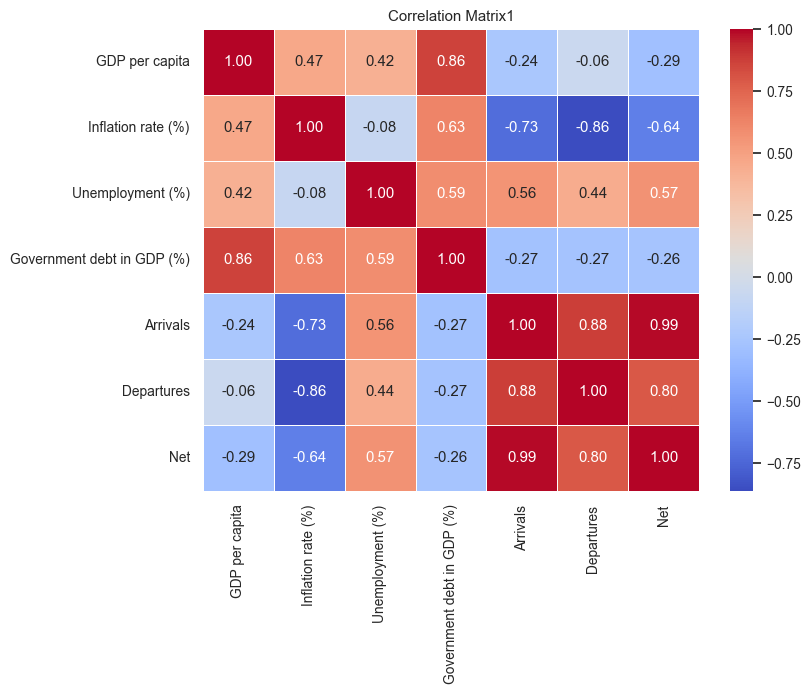

In [121]:
# Draw heat map
sns.set(font_scale=0.9)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix1')
plt.show()

#### [Analysis]
This correlation matrix provides correlation coefficients between various economic indicators and immigration data in the data set, which can be used to reveal the degree of association between variables. Here is an analysis of some key points in the correlation matrix:  

Correlation of GDP per capita with other indicators:  

* There is a high positive correlation (0.8636) with Government debt in GDP (%), indicating that GDP per capita growth is usually accompanied by an increase in the government debt ratio.  
* There is a moderate positive correlation (0.4669) with the inflation rate (%), which may imply that when the economy performs well, the price level also rises.  
* The correlation with Unemployment (%) is lower (0.417817) but still positive, which may reflect that economic growth does not always immediately solve employment problems.  

Correlation between immigration data (Arrivals, Departures, Net) and economic indicators:  

* Net migration (Net) is negatively correlated with the government debt ratio (-0.262693), possibly indicating that years with higher government debt do not necessarily attract more net migration.  
* Departures have a strong negative correlation with the inflation rate (-0.863678), suggesting that more people may choose to leave when inflation is higher.  
* The negative correlation between arrivals and the inflation rate is also very significant (-0.725276), suggesting that inflation may affect the decision to immigrate.  

Correlation between inflation rate and unemployment rate:  

* There is a slight negative correlation between the inflation rate and the unemployment rate (-0.079779), a finding that is contrary to the traditional Phillips curve and may require further data exploration and background understanding.

In [122]:
merged_data2 = data1.join(data2, how='outer').join(data3, how='outer')
merged_data2

,GDP per capita,GDP growth (real),Inflation rate (%),Unemployment (%),Government debt in GDP (%),Arrivals,Departures,Net,China,India,Japan,Korea,Philippines,Germany,UK,Canada,US,South Africa
Year,,,,,,,,,,,,,,,,,,
2018,42617.4,3.4%,1.6%,4.3%,28.0%,138629,88438,50191,2572,1066,110.0,244,562,137.0,1086,92,279.0,369
2019,43686.0,2.4%,1.6%,4.2%,32.0%,138988,89000,49988,2016,857,102.0,197,456,142.0,907,101,317.4,300
2020,42445.5,−2.1%,1.7%,4.6%,43.6%,177317,87390,89927,960,507,59.0,97,295,85.0,638,57,241.0,180
2021,45879.6,5.1%,3.0%,4.3%,52.0%,53667,56415,-2748,1658,745,107.0,211,525,147.0,909,103,254.0,221
2022,48202.1,3.3%,2.2%,4.4%,56.9%,55850,75314,-19464,2658,1736,132.0,327,3471,148.0,815,98,320.0,430
2023,49462.1,1.7%,2.0%,4.7%,58.5%,183649,97786,85863,4173,3090,150.0,272,10365,163.0,872,94,493.0,572


In [123]:
merged_data2['Inflation rate (%)'] = merged_data2['Inflation rate (%)'].str.rstrip('%').astype('float') / 100
merged_data2['Unemployment (%)'] = merged_data2['Unemployment (%)'].str.rstrip('%').astype('float') / 100
merged_data2['Government debt in GDP (%)'] = merged_data2['Government debt in GDP (%)'].str.rstrip('%').astype('float') / 100

merged_data2

,GDP per capita,GDP growth (real),Inflation rate (%),Unemployment (%),Government debt in GDP (%),Arrivals,Departures,Net,China,India,Japan,Korea,Philippines,Germany,UK,Canada,US,South Africa
Year,,,,,,,,,,,,,,,,,,
2018,42617.4,3.4%,0.016,0.043,0.280,138629,88438,50191,2572,1066,110.0,244,562,137.0,1086,92,279.0,369
2019,43686.0,2.4%,0.016,0.042,0.320,138988,89000,49988,2016,857,102.0,197,456,142.0,907,101,317.4,300
2020,42445.5,−2.1%,0.017,0.046,0.436,177317,87390,89927,960,507,59.0,97,295,85.0,638,57,241.0,180
2021,45879.6,5.1%,0.030,0.043,0.520,53667,56415,-2748,1658,745,107.0,211,525,147.0,909,103,254.0,221
2022,48202.1,3.3%,0.022,0.044,0.569,55850,75314,-19464,2658,1736,132.0,327,3471,148.0,815,98,320.0,430
2023,49462.1,1.7%,0.020,0.047,0.585,183649,97786,85863,4173,3090,150.0,272,10365,163.0,872,94,493.0,572


In [125]:
correlation_matrix2 = merged_data2.corr()
correlation_matrix2

,GDP per capita,Inflation rate (%),Unemployment (%),Government debt in GDP (%),Arrivals,Departures,Net,China,India,Japan,Korea,Philippines,Germany,UK,Canada,US,South Africa
GDP per capita,1.000000,0.466900,0.417817,0.863600,-0.242612,-0.058508,-0.289943,0.739087,0.844693,0.846084,0.729971,0.831439,0.716846,-0.049080,0.466073,0.750891,0.747584
Inflation rate (%),0.466900,1.000000,-0.079779,0.627275,-0.725276,-0.863678,-0.643244,-0.056888,0.014587,0.239721,0.231058,0.043101,0.356018,-0.009468,0.418062,-0.099537,-0.126625
Unemployment (%),0.417817,-0.079779,1.000000,0.587203,0.558451,0.443661,0.567125,0.361323,0.584473,0.123602,-0.084229,0.700025,-0.176027,-0.556804,-0.554031,0.533879,0.386405
Government debt in GDP (%),0.863600,0.627275,0.587203,1.000000,-0.274958,-0.269391,-0.262693,0.367553,0.587826,0.480402,0.392129,0.647070,0.322114,-0.444522,0.098506,0.458584,0.388627
Arrivals,-0.242612,-0.725276,0.558451,-0.274958,1.000000,0.879330,0.987985,0.193177,0.232029,-0.196970,-0.453679,0.319426,-0.336831,-0.180245,-0.569854,0.384522,0.177782
Departures,-0.058508,-0.863678,0.443661,-0.269391,0.879330,1.000000,0.795168,0.450903,0.437669,0.102169,-0.060576,0.444021,-0.083496,-0.018970,-0.330932,0.554191,0.487743
Net,-0.289943,-0.643244,0.567125,-0.262693,0.987985,0.795168,1.000000,0.099650,0.153418,-0.283971,-0.558037,0.262644,-0.401809,-0.223360,-0.618230,0.309781,0.068091
China,0.739087,-0.056888,0.361323,0.367553,0.193177,0.450903,0.099650,1.000000,0.951689,0.920163,0.746614,0.886199,0.776804,0.398201,0.464860,0.920174,0.982857
India,0.844693,0.014587,0.584473,0.587826,0.232029,0.437669,0.153418,0.951689,1.000000,0.859698,0.660024,0.980077,0.658425,0.107155,0.294907,0.956625,0.953088
Japan,0.846084,0.239721,0.123602,0.480402,-0.196970,0.102169,-0.283971,0.920163,0.859698,1.000000,0.908745,0.765696,0.930274,0.457308,0.718135,0.788383,0.903640


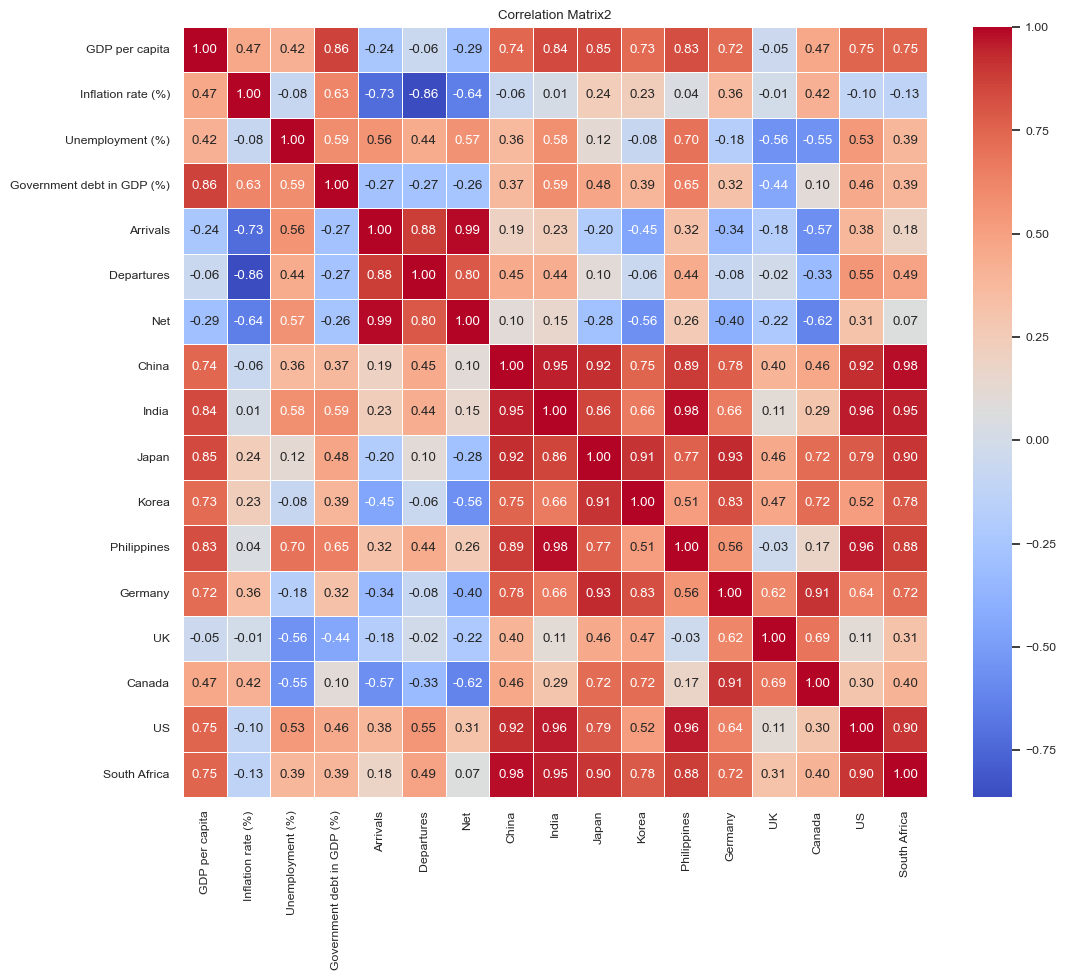

In [126]:
# Draw heat map
sns.set(font_scale=0.8)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix2')
plt.show()

#### [Analysis]
From the correlation matrix of the combined data, the following conclusions can be observed about the correlation between immigration country data and GDP, unemployment rate, and inflation rate:  

GDP and immigration countries:  

* New Zealand's GDP is positively correlated with immigration flows from various countries, especially those with large immigration flows, such as China and India. This may indicate an increase in immigration from these countries as New Zealand's economy grows and opportunities within the country increase.  
* This positive correlation may be indicative of the attractiveness of the New Zealand economy, especially for people in countries with rapidly developing economies who may seek better living and work opportunities.  

Unemployment rate and immigration countries:    

* The lack of significant correlation between the unemployment rate and immigration flows may indicate that fluctuations in the unemployment rate are relatively independent of the effects of immigration, or that changes in the unemployment rate are driven by broader domestic economic factors.  

Inflation rates and immigration countries:  

* The negative correlation between inflation rates and immigration flows may indicate that New Zealand may have been less attractive to immigrants during periods of higher inflation, as high inflation is often associated with rising costs of living and economic instability.  

Taken together, from the correlation between immigrants' nationality of origin and New Zealand's economic indicators, it can be seen that countries with good and stable economic conditions are more able to attract immigrants, especially from countries with active economies and large populations. This analysis can provide data support for New Zealand's immigration policy and economic development strategy, helping policymakers better understand the interaction between immigration and the national economy.

# Conclusion 

This data analysis reveals the complex links between New Zealand's GDP, inflation, unemployment and immigration flows. First, we find a significant positive relationship between New Zealand's GDP growth and government debt. This suggests that in years when the economy performs well, the government may stimulate the economy by increasing investment and expanding fiscal spending, which in turn increases debt levels. This situation reminds policymakers that while promoting economic growth, they also need to pay attention to the sustainability of debt. Especially when economic growth slows down, high debt may pose a threat to financial stability.

At the same time, this study also observed a negative correlation between the inflation rate and immigrant inflows and outflows, revealing that high inflation may weaken New Zealand's attractiveness and push people to look for a more stable economic environment. In addition, the analysis found that although inflation and unemployment show a slight negative correlation, this is contrary to the traditional Phillips Curve and may imply that current economic policies or global economic conditions have changed the applicability of this classic economic model.

In terms of immigration data, especially net migration, there is a negative correlation with government debt, reflecting that in years of high debt, New Zealand may become less attractive to immigrants. In addition, the high degree of correlation between immigration flows, especially the strong correlation between departure and entry, highlights the complexity of immigration decisions being affected by multiple factors, which requires policymakers to further analyze specific factors to optimize immigration policy and economic development. strategy.

Taken together, these correlations between New Zealand's economic indicators and immigration data reveal how economic performance, government policy and global economic conditions combine to influence the country's attractiveness and population movement patterns. These findings provide data support for the development of more forward-looking and responsive economic and immigration policies, helping policymakers better understand the interaction between the economy and immigration.

### Key findings:

1. Economic performance and government debt:  
There is a high positive correlation between New Zealand's GDP per capita and government debt, suggesting that when the economy is performing well, government debt levels may increase due to expanded investment and fiscal spending. This trend requires policymakers to remain vigilant in debt management to prevent fiscal risks if the economy slows down.  
  
2. Inflation, unemployment and immigration flows:  
Inflation rates are negatively correlated with migrant arrivals and departures, suggesting that high inflation may drive outflows and make New Zealand less attractive. In addition, the slight negative correlation between inflation and unemployment is contrary to the traditional Phillips curve, and further exploration of the economic mechanism behind this unconventional relationship is needed.  
  
3. Immigration and government debt:  
The negative correlation between immigration data (particularly net migration) and government debt may indicate that New Zealand becomes less attractive to immigrants during periods of higher debt. This may be related to economic uncertainty or fiscal austerity measures, affecting the inflow and outflow of migrants.  
  
4. Economic impact of immigration:  
The correlation between migration data and various economic indicators (especially GDP, inflation and unemployment) highlights the complex interaction between migration and macroeconomic factors. The analysis shows that when the economy is doing well, it attracts more immigrants, while hard times can hinder the inflow.